# Visualizing Data from an External Dataset

As a final test for this chapter, let's visualize some data from an external dataset, such as the digits dataset from scikit-learn.

We will need three tools in specific:
- scikit-learn for the actual data
- NumPy for data munging
- Matplotlib for visualization.

So let's start by importing all of these:

In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

The first step is to actually load the data:

In [7]:
digits = datasets.load_digits()

If we remember correctly, `digits` is supposed to have two different fields: a `data` field
containing the actual image data, and a `target` field containing the image labels. Rather
than trust our memory, we should simply investigate the digits object. We do this by typing
out its name, adding a period, and then hitting the `TAB` key: `digits.<TAB>`. This will
reveal that the `digits` object also contains some other fields, such as one called images.
The two fields, `images` and `data`, seem to simply differ by shape:

In [10]:
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)

(1797, 64)
(1797, 8, 8)
(1797,)


In both cases, the first dimension corresponds to the number of images in the dataset.
However, `data` has all the pixels lined up in one big vector, whereas `images` preserves the
8 x 8 spatial arrangement of each image.

Thus, if we wanted to plot a single image, the `images` field would be more appropriate.
First, we grab a single image from the dataset using NumPy's array slicing:

In [13]:
img = digits.images[0, :, :]

Here, we are saying that we want to grab the first row in the 1,797 items-long array and all
the corresponding $8 \times 8=64$ pixels. We can then plot the image using `plt`'s `imshow` function:

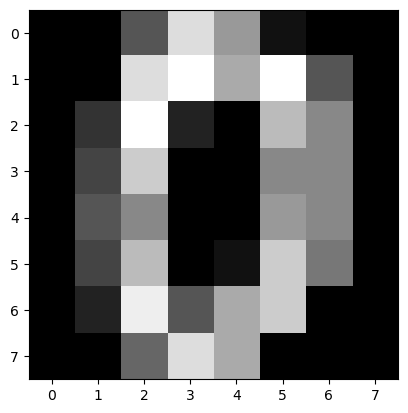

In [16]:
plt.imshow(img, cmap='gray')
plt.savefig('figures/02.04-digit0.png')

In addition, I also specified a color map with the `cmap` argument. By default, Matplotlib
uses MATLAB's default colormap `jet`. However, in the case of grayscale images, the gray
colormap makes more sense.

Finally, we can plot a whole number of digit samples using `plt`'s `subplot` function. The
`subplot` function is the same as in MATLAB, where we specify the number of rows,
number of columns, and current subplot index (starts counting at 1). We will use `for loop`
to iterate over the first ten images in the dataset and every image gets assigned its own
subplot:

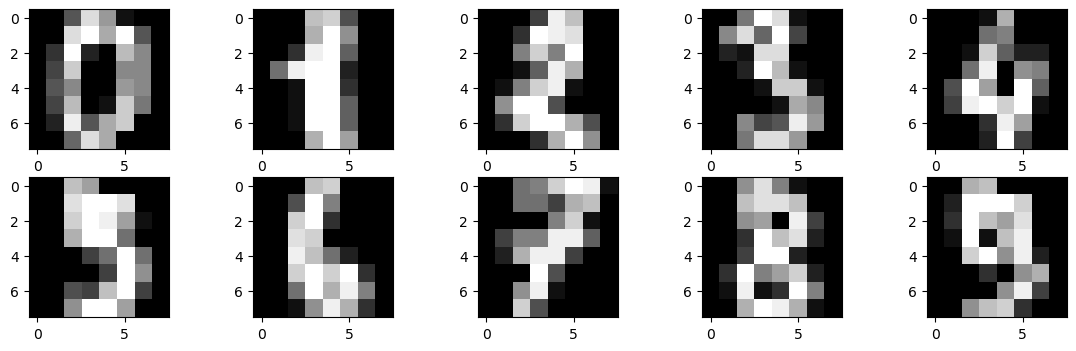

In [20]:
plt.figure(figsize=(14, 4))

for image_index in range(10):
    # images are 0-indexed, subplots are 1-indexed
    subplot_index = image_index + 1
    plt.subplot(2, 5, subplot_index)
    plt.imshow(digits.images[image_index, :, :], cmap='gray')